In [30]:
import os
import pandas as pd
import mpvis
from mpvis import mpdfg

blasting_event_log_path = os.path.join("blasting_with_rework_event_log.csv")

# Read event log
blasting_event_log = pd.read_csv(blasting_event_log_path, sep=";")

# Key is the column format name of pm4py
# Value is the column name of the specific log and soon to be changed
# We will always need 3 columns for case, activity and timestamp
blasting_format = {
    "case:concept:name": "Case ID",
    "concept:name": "Activity",
    "time:timestamp": "Complete",
    "start_timestamp": "Start",
    "org:resource": "Resource",
    "cost:total": "Cost",
}

# Format event log 
blasting_event_log = mpvis.log_formatter(blasting_event_log, blasting_format)

In [31]:
# Discover of multi perspective DFG + start and end activities

(
    multi_perspective_dfg,
    start_activities,
    end_activities,
) = mpdfg.discover_multi_perspective_dfg(
    blasting_event_log,
    calculate_cost=True,
    calculate_frequency=True,
    calculate_time=True,
    frequency_statistic="absolute-activity",
    time_statistic="mean",
    cost_statistic="mean",
)

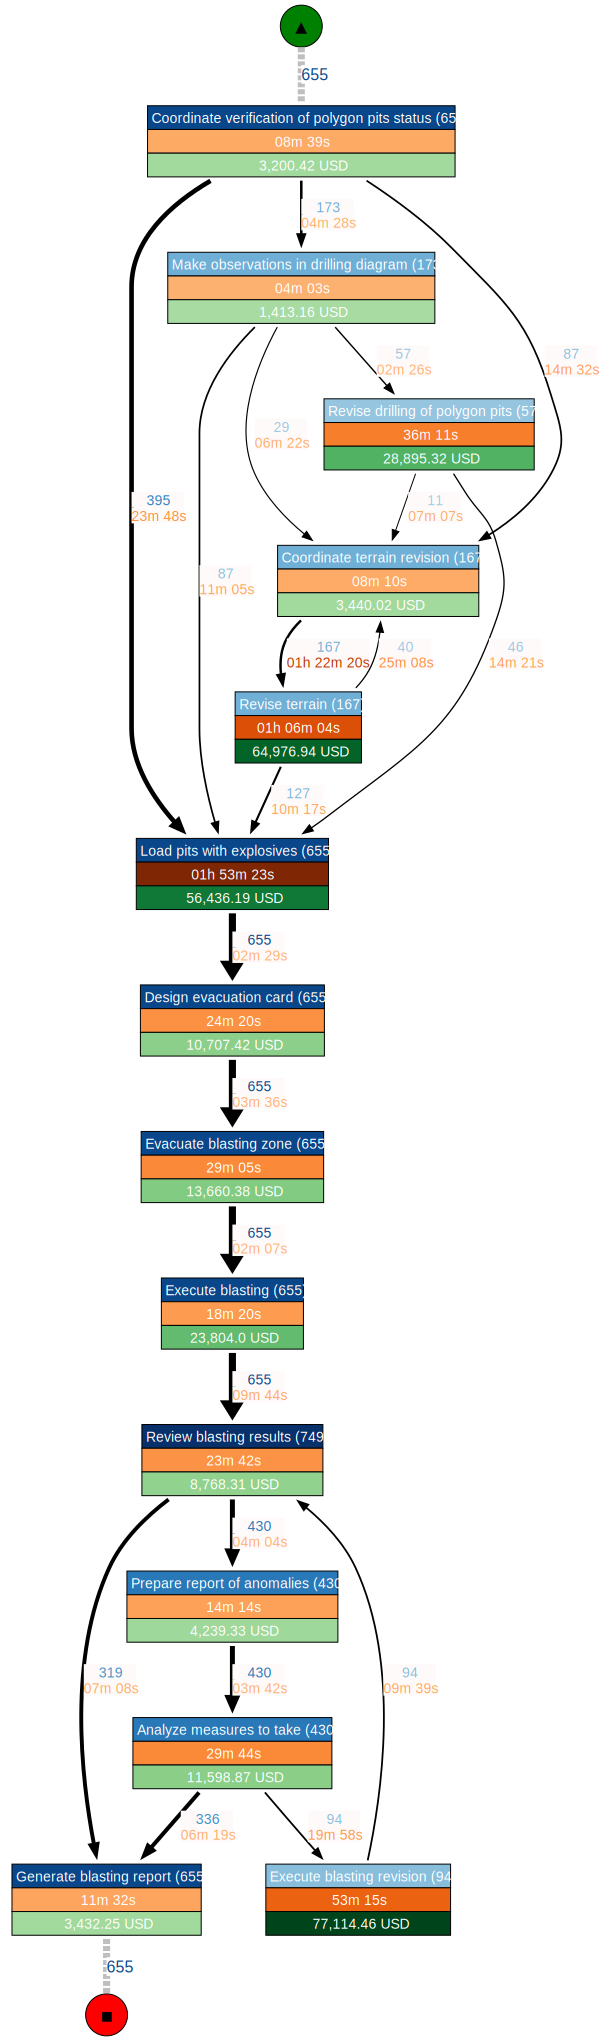

In [32]:
# Visualize the diagram of the multi perspective DFG

mpdfg.view_multi_perspective_dfg(
    multi_perspective_dfg,
    start_activities,
    end_activities,
    visualize_frequency=True,
    visualize_time=True,
    visualize_cost=True,
    rankdir="TB",
)

In [33]:
# Save the diagram to file_name location with especified format

mpdfg.save_vis_multi_perspective_dfg(
    multi_perspective_dfg,
    start_activities,
    end_activities,
    file_name="blasting_process",
    visualize_frequency=True,
    visualize_time=True,
    visualize_cost=True,
    format="png",
    rankdir="TB",
    diagram_tool="graphviz", # or mermaid
)